# Python Assignment 4

## 1. Mandelbrot Set

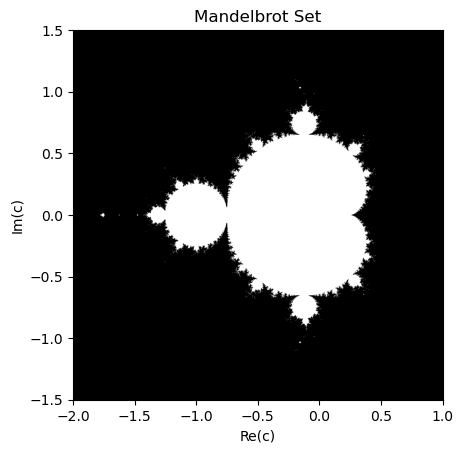

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter, threshold):

    #grid of complex numbers across [xmin, xmax] x [ymin, ymax]
    x, y = np.mgrid[xmin:xmax:width*1j, ymin:ymax:height*1j]
    #complex numbers
    c = x + 1j*y
    #initialize z
    z = np.zeros_like(c)

    #mask to see which points are in the set
    mask = np.ones(c.shape, dtype = bool)

    for i in range (max_iter):
        #keep only diverged points
        z[mask] = z[mask] ** 2 + c[mask]
        #update mask
        mask[np.abs(z) > threshold] = False

    #only return the points in the set through the mask
    return mask


def main():
    #set by the assignment
    width = 1000
    height = 1000
    xmin, xmax = -2.0, 1.0
    ymin, ymax = -1.5, 1.5
    max_iter = 50
    threshold = 100

    mandelbrot_mask = mandelbrot(xmin, xmax, ymin, ymax, width, height, max_iter, threshold)

#from assignment
    plt.imshow(mandelbrot_mask.T, extent=[-2, 1, -1.5, 1.5])
    plt.gray()
    #axis and title
    plt.title("Mandelbrot Set")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.savefig("mandelbrot.png", dpi=300)
    plt.show()

#run the above code
if __name__ == "__main__":
    main()

## 2. Markov Chain

In [ ]:
import numpy as np

def create_random_transition_matrix(n):
    #random values [0,1]
    P = np.random.rand(n, n)
    #normalize each row sum to 1
    P /= P.sum(axis=1, keepdims=True)
    return P

def create_random_distribution(n):
    p = np.random.rand(n)
    #normalize sum(p) = 1
    p /= p.sum()
    return p

def apply_transition(P, p, steps=50):
    #transition rule
    PT = P.T
    for _ in range(steps):
        p = np.dot(PT, p)
    return p

def compute_stationary_distribution(P):
    eigvals, eigvecs = np.linalg.eig(P.T)
    #eigenvalue closest to 1
    idx = np.argmin(np.abs(eigvals - 1))
    v = np.real(eigvecs[:, idx])
    #rid of negative components
    v = np.abs(v)
    #normalize
    v /= v.sum()
    return v

def main():
    #set by assignment
    n = 5

    #random 5x5 matrix
    P = create_random_transition_matrix(n)
    print("Transition matrix (P):\n", P, "\n")

    #probability vector
    p = create_random_distribution(n)
    print("Initial probability vector (p):\n", p, "\n")

    #transition rule done 50 times
    p50 = apply_transition(P, p, steps=50)
    print("Probability vector after 50 transitions:\n", p50, "\n")

    #stationary distribution
    stationary = compute_stationary_distribution(P)
    print("Stationary distribution (v):\n", stationary, "\n")

    #compute difference
    diff = np.abs(p50 - stationary)
    print("Component-wise absolute difference:\n", diff, "\n")
    print("Maximum difference:", np.max(diff))

    #check their error
    if np.allclose(p50, stationary, atol=1e-5):
        print("\np50 and stationary distribution match within 10^-5.")
    else:
        print("\np50 and stationary distribution do not match within 10^-5.")

#run above code
if __name__ == "__main__":
    main()

Transition matrix P:
 [[0.35023779 0.24421897 0.12602554 0.25042454 0.02909317]
 [0.43336331 0.05234064 0.37021415 0.09779199 0.04628991]
 [0.1495626  0.049838   0.18434666 0.35214657 0.26410617]
 [0.24018621 0.49761615 0.13176457 0.03136613 0.09906695]
 [0.10218743 0.72751613 0.11942965 0.02886772 0.02199907]] 

Initial probability vector p:
 [0.24518276 0.21805208 0.20307502 0.25137878 0.08231136] 

Probability vector after 50 transitions (p50):
 [0.28907736 0.24675525 0.19823965 0.17444473 0.09148302] 

Stationary distribution v:
 [0.28907736 0.24675525 0.19823965 0.17444473 0.09148302] 

Component-wise absolute difference:
 [4.44089210e-16 1.94289029e-16 1.94289029e-16 1.11022302e-16
 1.24900090e-16] 

Maximum difference: 4.440892098500626e-16

p50 and stationary distribution match within 10^-5.


## 3. Taylor Series Approximation